# House Prices - Advanced Regression Techniques
## Predict sales prices and practice feature engineering, RFs, and gradient boosting

Ser capaz de predecir el precio de una vivienda a partir de una base de datos que contiene 79 variables las que describen (casi) todo aspecto de las residencias en **Ames, Iowa**.

In [2]:
# CARGAR LAS LIBRERIAS BÁSICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Se cargan los archivos básicos
df_total = pd.read_csv('../data/train.csv')

In [20]:
# Cantidad de variables y observaciones
df_total.shape

(1460, 81)

In [12]:
df_total.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
len(df_total.columns)

81

Como se puede ver inicialmente contamos con 81 variables en total, de las cuales:
- 1 variable objetivo: SalePrice
- 37 variables numéricas
- 43 variables categoricas

La alta cantidad de variables categóricas cada una con múltiples niveles puede dificultar el tratamiento de la base si siguimos la vía de tratarlas como variables dummy. Se hace necesario hacer una selección de variables y (eventualmente) una ingeniería de variables para reducir este número disminuyendo la perdida de la información.

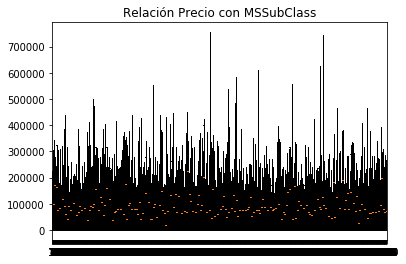

In [23]:
fig1, ax1 = plt.subplots()
ax1.set_title('Relación Precio con MSSubClass')
ax1.boxplot(df_total.loc[:, ['MSSubClass', 'SalePrice']])
plt.show()

In [22]:
plt.show()